#### NAME: Divyang Bagla
#### PANEL: D (D2)
#### ROLL NO.: PD32
#### SUBJECT: DWDM
#### LAB ASSN 5 (K Means Clustering)

##### Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Reading the dataset and removing the bad lines

In [2]:
df=pd.read_csv('seeds.csv',sep='\t',error_bad_lines=False)
att_names=['area','perimeter','compactness','length','width','asymmetry_coeff','length_kernel_groove','wheat']
df.columns=att_names

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,length_kernel_groove,wheat
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


#### Checking its shape and the mean,min,max,count etc. of numerical attributes

In [4]:
df.shape

(198, 8)

In [5]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry_coeff,length_kernel_groove,wheat
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


#### Checking the value count of target variable

In [6]:
df['wheat'].value_counts()

2    68
3    65
1    65
Name: wheat, dtype: int64

#### dropping the taget variable to apply clustering

In [7]:
df_clus = df.drop('wheat',axis=1)

In [8]:
df_clus.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,length_kernel_groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956


In [9]:
x = df_clus.values

#### Applying the KMeans Clustering
###### Taking the no of clusters to be 5

In [10]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)

print(y_kmeans5)
y = kmeans5.cluster_centers_

[3 3 3 3 3 3 1 3 1 3 2 3 3 3 0 3 3 2 3 3 3 2 3 3 2 2 3 2 2 3 3 3 3 1 1 3 0
 2 2 2 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 2 1 1 1 4 1 1 1 4 4
 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 1 4 4 4 4 1 4 4 1 1 1 1 3 3 1 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0
 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 2 0 0 2 2 0 0 2 0]


#### printing the center of clusters

In [11]:
print(y)

[[11.91018868 13.26811321  0.84902264  5.23803774  2.85890566  5.24839623
   5.11907547]
 [16.562      15.3916      0.878244    5.88816     3.4808      4.10948
   5.7252    ]
 [12.51193548 13.47516129  0.86527097  5.25812903  2.97706452  2.86751935
   4.98680645]
 [14.76214286 14.51547619  0.8801881   5.58688095  3.29530952  2.40169286
   5.15595238]
 [19.15744681 16.47553191  0.88669574  6.27134043  3.77223404  3.47355319
   6.12570213]]


#### Plotting the scatter plot based on area and perimeter

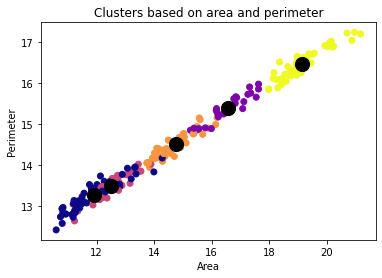

In [12]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans5,cmap='plasma')
plt.scatter(y[:,0],y[:,1],s=200,c='black')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Clusters based on area and perimeter')
plt.show()

#### Plotting the scatter plot based on compactness and length

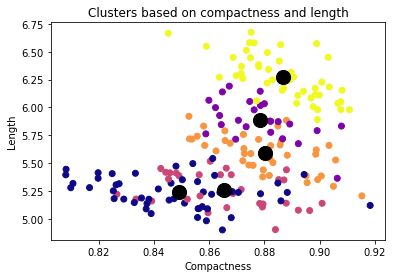

In [13]:
plt.scatter(x[:,2],x[:,3],c=y_kmeans5,cmap='plasma')
plt.scatter(y[:,2],y[:,3],s=200,c='black')
plt.xlabel('Compactness')
plt.ylabel('Length')
plt.title('Clusters based on compactness and length')
plt.show()

### Elbow Method to check no of clusters

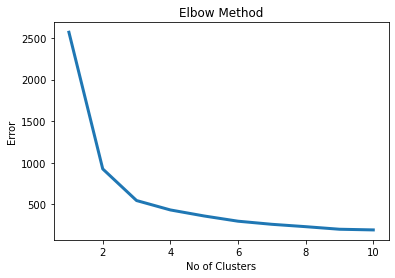

In [14]:
Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1,11),Error,linewidth ='3')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.show()
    

##### k=3 is approriate as observed from the elbow method.

In [15]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)

print(y_kmeans3)
y = kmeans3.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
print(y)

[[11.99458333 13.29055556  0.85231944  5.23556944  2.87631944  4.73304167
   5.09663889]
 [18.71966667 16.2995      0.884745    6.20988333  3.72128333  3.61626667
   6.06386667]
 [14.64818182 14.46727273  0.87831212  5.57075758  3.27510606  2.66921515
   5.19242424]]


#### Plotting the scatter plot based on area and perimeter

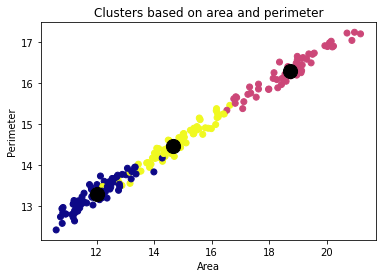

In [17]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='plasma')
plt.scatter(y[:,0],y[:,1],s=200,c='black')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Clusters based on area and perimeter')
plt.show()

#### Plotting the scatter plot based on compactness and length

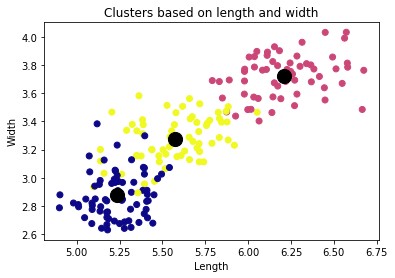

In [18]:
plt.scatter(x[:,3],x[:,4],c=y_kmeans3,cmap='plasma')
plt.scatter(y[:,3],y[:,4],s=200,c='black')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Clusters based on length and width')
plt.show()